In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Data Preparation

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

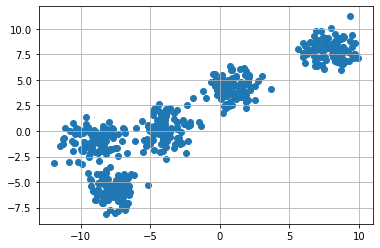

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
k=5
color = ["green","red","blue","yellow","orange"]

clusters = {}

# Initializing Random state to each cluster
for kx in range(k):
    centre = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center':centre,
        'points':points,
        'color':color[kx]
    }
    clusters[kx]= cluster

In [5]:
centre = 10*(2*np.random.random((X.shape[1],))-1)
print(centre)

[ 9.22617782 -6.09381165]


In [6]:
print(clusters)

{0: {'center': array([1.29545978, 0.5875184 ]), 'points': [], 'color': 'green'}, 1: {'center': array([0.42348744, 8.01911382]), 'points': [], 'color': 'red'}, 2: {'center': array([-9.77936023, -0.17506355]), 'points': [], 'color': 'blue'}, 3: {'center': array([8.40086401, 1.81281342]), 'points': [], 'color': 'yellow'}, 4: {'center': array([-5.15375009, -1.56512053]), 'points': [], 'color': 'orange'}}


In [7]:
# This distance will calculate the distance of the cluster from a given point
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [8]:
v1 = np.array([1,2])
v2 = np.array([3,5])
distance(v1,v2)

3.605551275463989

In [30]:
# Step 2
#E-step
def assignPointTocluster(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        # To choose the cluster we use minimum
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
        
# m-step for updating our cluster
def updateClusters(clusters):
        # Here we update each of the cluster centreaccording to the mean of the points in it
        for kx in range(k):
            pts = np.array(clusters[kx]['points'])
            if pts.shape[0]>0: #If a cluster has some non zero point then we are goint to take the mean and update the cluster
                new_u = pts.mean(axis=0)
                clusters[kx]['center'] = new_u
                clusters[kx]['points'] = [] # empty that point for next E-step so that new points get inserted for the cluster

def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points'])) # This would give us the number of points ieing in that cluster.
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        
        # Plotting the points
        try : # If we get a list of size 0
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        
        except:
            pass
        
        # Plot the clusters centre
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")

In [31]:

def plotClusterstry(clusters):
    for kx in range(k):
        print(len(clusters[kx]['points'])) # This would give us the number of points ieing in that cluster.
    return

assignPointTocluster(clusters)
plotClusterstry(clusters)

560
710
1040
780
1910


(560, 2)
(710, 2)
(1040, 2)
(780, 2)
(1910, 2)


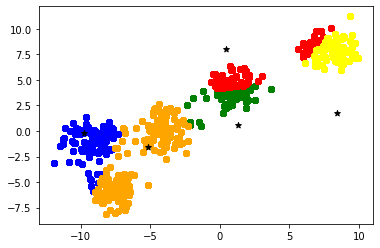

In [32]:
plotClusters(clusters)

(74, 2)
(72, 2)
(104, 2)
(100, 2)
(150, 2)


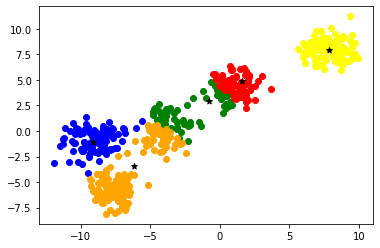

In [36]:
assignPointTocluster(clusters)
plotClusters(clusters)
updateClusters(clusters)

# Now the points are not converging after 5 updates